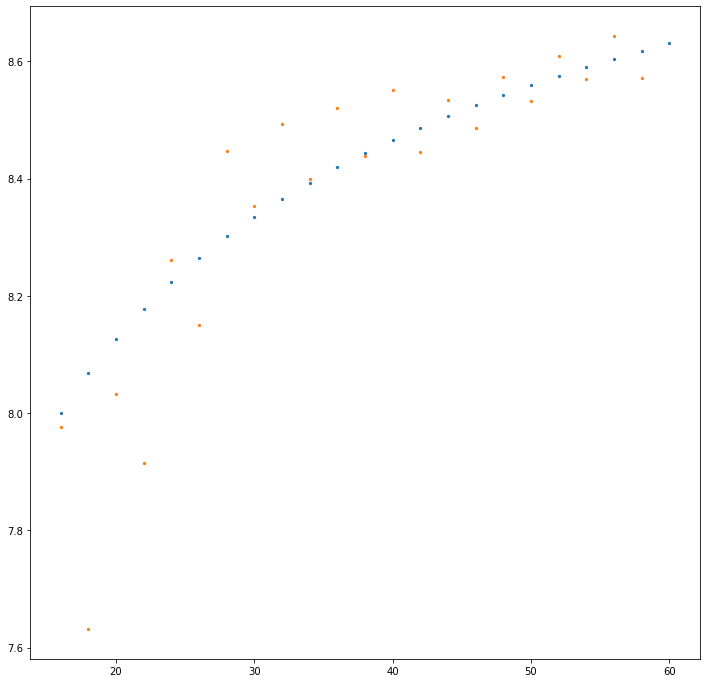

[9.769539078156313, -4.458917835671343, 203.55761670288877]
Done
Time taken:  84.10642916699999


In [11]:
#5D Chi-Squared Surface Thing

import numpy as np
import matplotlib.pyplot as plt
import time

start = time.perf_counter()

measuredNuclearData = np.loadtxt("ZNBE.dat")

for i in measuredNuclearData:
    
    i[2] = i[2] * (i[0] + i[1]) 
    
#This makes measuredNuclearData elements be: [Z, N, BE] instead of BE/A

samples = 500

chiSqSurfaceData = [0, 0, float('inf'), []]

AvField = np.linspace(-25, 25, samples)
AsField = np.linspace(-25, 25, samples)

for Av in AvField:
    for As in AsField:
        chiSq = 0
        SEMFData = []
        for i in measuredNuclearData:

            Z = i[0]
            N = i[1]
            A = N + Z
            
            if A > 60:
                break
            if Z != N or Z < 8:
                continue
                
            vol = Av * A
            sur = As * A**(2/3)
            
            BE = vol + sur
            
            SEMFData.append([A, BE])
            chiSq += (BE - i[2])**2
                        
        if chiSq < chiSqSurfaceData[2]:
            chiSqSurfaceData = [Av, As, chiSq, SEMFData]                
        

SEMFData = chiSqSurfaceData[3]

plt.figure(figsize=(12,12))

A = [i[0] for i in SEMFData]
BE = [i[1]/i[0] for i in SEMFData]

plt.scatter(A, BE, s=5)
realData = [[i[0]+i[1],i[2]] for i in measuredNuclearData if (i[0] == i[1] and i[0] >= 8 and (i[0] + i[1]) < 60)]

A = [i[0] for i in realData]
BE = [i[1]/i[0] for i in realData]

plt.scatter(A, BE, s = 5)
plt.show()

print(chiSqSurfaceData[0:3])

print("Done")
stop = time.perf_counter()
print("Time taken: ", stop - start)

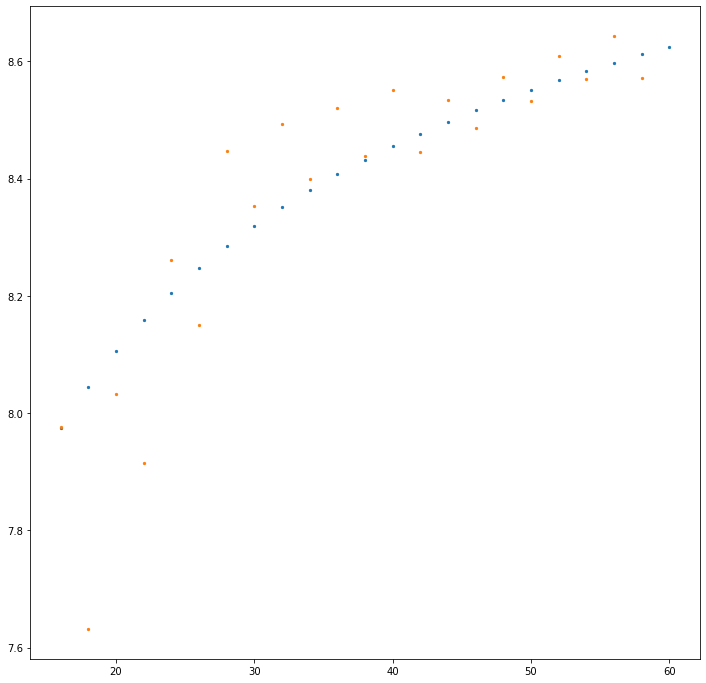

[9.800000000000004, -4.599999999999994, 202.51692832069244]
Done
Time taken:  70.96043862499994


In [12]:
start = time.perf_counter()

AvField = np.linspace(-50, 50, 1001)
AsField = np.linspace(-50, 50, 1001)

number_of_points = 200000 # ~4 seconds per 10,000

SEMFData = []
chiSqSurfaceData = [0, 0, float('inf'), []]

for i in range(number_of_points):
    
    chiSq = 0
    SEMFData = []
    Av = AvField[np.random.randint(0, 1001)]
    As = AsField[np.random.randint(0, 1001)]
    
    for i in measuredNuclearData:
    
        Z = i[0]
        N = i[1]
        A = N + Z

        if A > 60:
            break
        if Z != N or Z < 8:
            continue

        vol = Av * A
        sur = As * A**(2/3)

        BE = vol + sur

        SEMFData.append([A, BE])
        chiSq += (BE - i[2])**2
    
    if chiSq < chiSqSurfaceData[2]:
        chiSqSurfaceData = [Av, As, chiSq, SEMFData]

SEMFData = chiSqSurfaceData[3]
realData = [[i[0]+i[1],i[2]] for i in measuredNuclearData if (i[0] == i[1] and i[0] >= 8 and (i[0] + i[1]) < 60)]

plt.figure(figsize=(12,12))

A = [i[0] for i in SEMFData]
BE = [i[1]/i[0] for i in SEMFData]

plt.scatter(A, BE, s=5)

A = [i[0] for i in realData]
BE = [i[1]/i[0] for i in realData]

plt.scatter(A, BE, s = 5)
plt.show()

print(chiSqSurfaceData[0:3])

print("Done")
stop = time.perf_counter()
print("Time taken: ", stop - start)